CMOS의 NFET, PFET data의 Gaussian 함수로 구현

In [ ]:
import numpy as np
import pandas as pd

np.random.seed(0)
################# CMOS Characteristics On-Currents
NFET_Ion_1=np.random.normal(loc=600, scale=100, size=100000)
PFET_Ion_1=np.random.normal(loc=500, scale=150, size=100000)

################# CMOS Characteristics On-Currents (randn)
NFET_Ion_2=np.random.randn(100000)*100+600
PFET_Ion_2=np.random.randn(100000)*150+500

DF_CMOS = pd.DataFrame({
    'nFET-1': NFET_Ion_1, 'pFET-1': PFET_Ion_1,
    'nFET-2' : NFET_Ion_2, 'pFET-2': PFET_Ion_2
})

In [ ]:
DF_CMOS.head()

,nFET-1,pFET-1,nFET-2,pFET-2
0,776.405235,427.430376,603.950990,740.860566
1,640.015721,693.208560,633.837761,335.793549
2,697.873798,480.518193,515.781681,688.755836
3,824.089320,470.288242,595.036772,718.713608
4,786.755799,449.826861,476.975464,456.169520


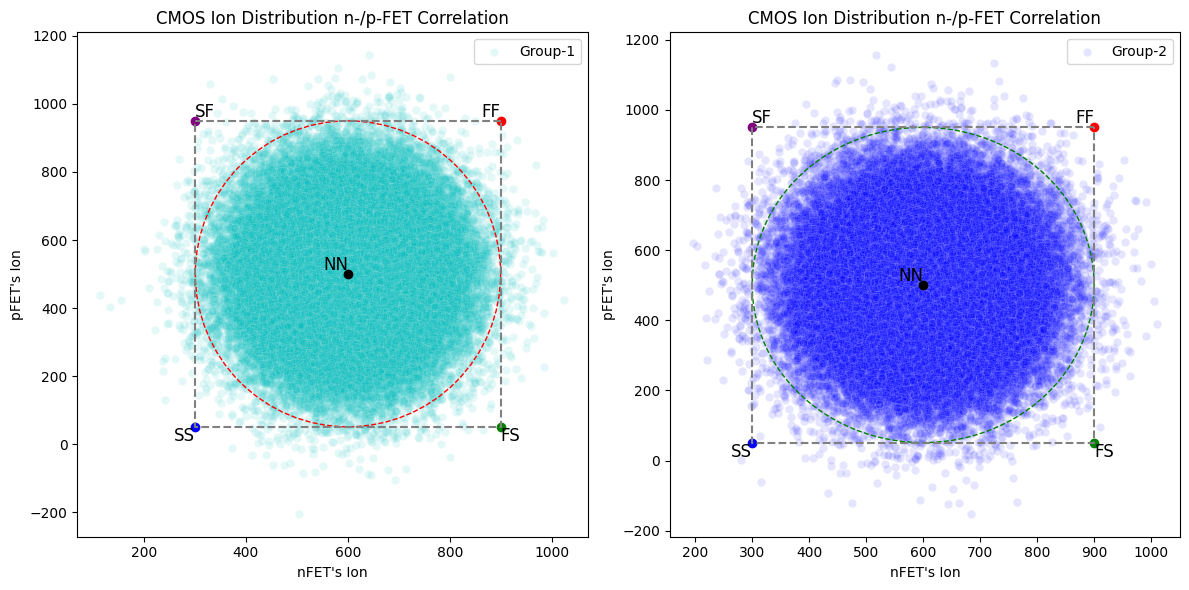

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.patches import Ellipse

np.random.seed(0)

# CMOS Characteristics On-Currents
################# CMOS Characteristics On-Currents
NFET_Ion_1=np.random.normal(loc=600, scale=100, size=100000)
PFET_Ion_1=np.random.normal(loc=500, scale=150, size=100000)

################# CMOS Characteristics On-Currents (randn)
NFET_Ion_2=np.random.randn(100000)*100+600
PFET_Ion_2=np.random.randn(100000)*150+500

DF_CMOS = pd.DataFrame({
    'nFET-1': NFET_Ion_1, 'pFET-1': PFET_Ion_1,
    'nFET-2': NFET_Ion_2, 'pFET-2': PFET_Ion_2
})

# Scatter plot 생성
fig, axes = plt.subplots(1, 2, figsize=(12, 6))

# 첫 번째 subplot
ax1 = axes[0]
sns.scatterplot(x=DF_CMOS['nFET-1'], y=DF_CMOS['pFET-1'], alpha=0.1, color='c', label='Group-1', ax=ax1)
ax1.set_title('CMOS Ion Distribution n-/p-FET Correlation')
ax1.set_xlabel("nFET's Ion")
ax1.set_ylabel("pFET's Ion")
ax1.legend()

# 두 번째 subplot
ax2 = axes[1]
sns.scatterplot(x=DF_CMOS['nFET-2'], y=DF_CMOS['pFET-2'], alpha=0.1, color='b', label='Group-2', ax=ax2)
ax2.set_title('CMOS Ion Distribution n-/p-FET Correlation')
ax2.set_xlabel("nFET's Ion")
ax2.set_ylabel("pFET's Ion")
ax2.legend()

# Median 및 Mean 계산
median_1 = DF_CMOS['nFET-1'].median(), DF_CMOS['pFET-1'].median()
median_2 = DF_CMOS['nFET-2'].median(), DF_CMOS['pFET-2'].median()

mean_1 = DF_CMOS['nFET-1'].mean(), DF_CMOS['pFET-1'].mean()
mean_2 = DF_CMOS['nFET-2'].mean(), DF_CMOS['pFET-2'].mean()

sigma3_1 = 3*DF_CMOS['nFET-1'].std(), 3*DF_CMOS['pFET-1'].std()
sigma3_2 = 3*DF_CMOS['nFET-2'].std(), 3*DF_CMOS['pFET-2'].std()

# Deviation Contour Plot
def plot_3sigma(ax, mean, cov, sigma3, color):
    eigenvalues, eigenvectors = np.linalg.eigh(cov)
    order = eigenvalues.argsort()[::-1]
    eigenvalues = eigenvalues[order]
    eigenvectors = eigenvectors[:, order]  # eigenvectors의 순서를 변경

    std_deviation = np.sqrt(eigenvalues) * 3

    ### Corner Points
    FF = (mean[0] + sigma3[0], mean[1] + sigma3[1])
    SS = (mean[0] - sigma3[0], mean[1] - sigma3[1])
    FS = (mean[0] + sigma3[0], mean[1] - sigma3[1])
    SF = (mean[0] - sigma3[0], mean[1] + sigma3[1])
    NN = (mean[0], mean[1])

    ellipse = Ellipse(xy=mean, width=std_deviation[0] * 2, height=std_deviation[1] * 2,
                      angle=np.degrees(np.arctan2(*eigenvectors[:, 0][::-1])),
                      edgecolor=color, fc='None', lw=1, linestyle='--')
    ax.add_patch(ellipse)

    # NN, FF, SS, FS, SF Corner Points Plot
    ax.plot(FF[0], FF[1], 'o', color='red')
    ax.text(FF[0], FF[1], 'FF', fontsize=12, ha='right', va='bottom')

    ax.plot(SS[0], SS[1], 'o', color='blue')
    ax.text(SS[0], SS[1], 'SS', fontsize=12, ha='right', va='top')

    ax.plot(FS[0], FS[1], 'o', color='green')
    ax.text(FS[0], FS[1], 'FS', fontsize=12, ha='left', va='top')

    ax.plot(SF[0], SF[1], 'o', color='purple')
    ax.text(SF[0], SF[1], 'SF', fontsize=12, ha='left', va='bottom')

    # Nominal Corner Plot
    ax.plot(NN[0], NN[1], 'o', color='black')
    ax.text(NN[0], NN[1], 'NN', fontsize=12, ha='right', va='bottom')

    # Corner Box Plot
    rect_x = [FF[0], SF[0], SS[0], FS[0], FF[0]]
    rect_y = [FF[1], SF[1], SS[1], FS[1], FF[1]]
    ax.plot(rect_x, rect_y, linestyle='--', color='gray')

# 3시그마 범위 계산 및 그리기
cov_1 = np.cov(DF_CMOS[['nFET-1', 'pFET-1']], rowvar=False)
cov_2 = np.cov(DF_CMOS[['nFET-2', 'pFET-2']], rowvar=False)


plot_3sigma(ax1, mean_1, cov_1, sigma3_1, 'red')  # 첫 번째 subplot에 타원 그리기
plot_3sigma(ax2, mean_2, cov_2, sigma3_2, 'green')  # 두 번째 subplot에 타원 그리기

plt.tight_layout()
plt.show()


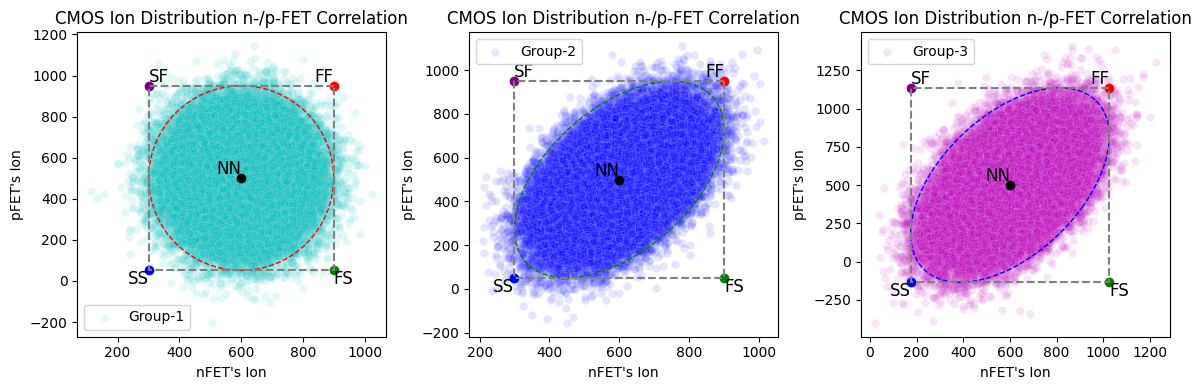

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.patches import Ellipse

np.random.seed(0)

## Group-1
# CMOS Characteristics On-Currents
# Only Random Components
NFET_Ion_1 = np.random.randn(100000) * 100 + 600
PFET_Ion_1 = np.random.randn(100000) * 150 + 500


## Group-2
# Implementing Systematic Variation Components Using Co-Variance
# 평균 및 표준편차
mean = [600, 500]     # Mean values of nFET and pFET
std_dev = [100, 150]  # Standard Deviations of nFET and pFET
correlation = 0.5  # 원하는 상관관계
covariance = correlation * std_dev[0] * std_dev[1]
cov_matrix = [[std_dev[0]**2, covariance], [covariance, std_dev[1]**2]]
# 다변량 정규 분포에서 샘플 생성
FET_Ion = np.random.multivariate_normal(mean, cov_matrix, size=100000)

## Group-3
random_nFET = np.random.randn(100000)  # Un-Correlated
random_pFET = np.random.randn(100000)  # Un-Correlated
systematic_variation = np.random.randn(100000)  # Systematic Variation

NFET_Ion_3 = (random_nFET + systematic_variation)*100 + 600
PFET_Ion_3 = (random_pFET + systematic_variation)*150 + 500

DF_CMOS = pd.DataFrame({
    'nFET-1': NFET_Ion_1, 'pFET-1': PFET_Ion_1,
    'nFET-2': FET_Ion[:,0], 'pFET-2': FET_Ion[:,1],
    'nFET-3': NFET_Ion_3, 'pFET-3': PFET_Ion_3,
})

# Scatter plot 생성
fig, axes = plt.subplots(1, 3, figsize=(12, 4))

# 첫 번째 subplot
ax1 = axes[0]
sns.scatterplot(x=DF_CMOS['nFET-1'], y=DF_CMOS['pFET-1'], alpha=0.1, color='c', label='Group-1', ax=ax1)
ax1.set_title('CMOS Ion Distribution n-/p-FET Correlation')
ax1.set_xlabel("nFET's Ion")
ax1.set_ylabel("pFET's Ion")
ax1.legend()

# 두 번째 subplot
ax2 = axes[1]
sns.scatterplot(x=DF_CMOS['nFET-2'], y=DF_CMOS['pFET-2'], alpha=0.1, color='b', label='Group-2', ax=ax2)
ax2.set_title('CMOS Ion Distribution n-/p-FET Correlation')
ax2.set_xlabel("nFET's Ion")
ax2.set_ylabel("pFET's Ion")
ax2.legend()

# 두 번째 subplot
ax3 = axes[2]
sns.scatterplot(x=DF_CMOS['nFET-3'], y=DF_CMOS['pFET-3'], alpha=0.1, color='m', label='Group-3', ax=ax3)
ax3.set_title('CMOS Ion Distribution n-/p-FET Correlation')
ax3.set_xlabel("nFET's Ion")
ax3.set_ylabel("pFET's Ion")
ax3.legend()

# Median 및 Mean 계산
median_1 = DF_CMOS['nFET-1'].median(), DF_CMOS['pFET-1'].median()
median_2 = DF_CMOS['nFET-2'].median(), DF_CMOS['pFET-2'].median()
median_3 = DF_CMOS['nFET-3'].median(), DF_CMOS['pFET-3'].median()

mean_1 = DF_CMOS['nFET-1'].mean(), DF_CMOS['pFET-1'].mean()
mean_2 = DF_CMOS['nFET-2'].mean(), DF_CMOS['pFET-2'].mean()
mean_3 = DF_CMOS['nFET-3'].mean(), DF_CMOS['pFET-3'].mean()

sigma3_1 = 3*DF_CMOS['nFET-1'].std(), 3*DF_CMOS['pFET-1'].std()
sigma3_2 = 3*DF_CMOS['nFET-2'].std(), 3*DF_CMOS['pFET-2'].std()
sigma3_3 = 3*DF_CMOS['nFET-3'].std(), 3*DF_CMOS['pFET-3'].std()

# Deviation Contour Plot
def plot_3sigma(ax, mean, cov, sigma3, color):
    eigenvalues, eigenvectors = np.linalg.eigh(cov)
    order = eigenvalues.argsort()[::-1]
    eigenvalues = eigenvalues[order]
    eigenvectors = eigenvectors[:, order]  # eigenvectors의 순서를 변경

    std_deviation = np.sqrt(eigenvalues) * 3

    ### Corner Points
    FF = (mean[0] + sigma3[0], mean[1] + sigma3[1])
    SS = (mean[0] - sigma3[0], mean[1] - sigma3[1])
    FS = (mean[0] + sigma3[0], mean[1] - sigma3[1])
    SF = (mean[0] - sigma3[0], mean[1] + sigma3[1])
    NN = (mean[0], mean[1])

    ellipse = Ellipse(xy=mean, width=std_deviation[0] * 2, height=std_deviation[1] * 2,
                      angle=np.degrees(np.arctan2(*eigenvectors[:, 0][::-1])),
                      edgecolor=color, fc='None', lw=1, linestyle='--')
    ax.add_patch(ellipse)

    # NN, FF, SS, FS, SF Corner Points Plot
    ax.plot(FF[0], FF[1], 'o', color='red')
    ax.text(FF[0], FF[1], 'FF', fontsize=12, ha='right', va='bottom')

    ax.plot(SS[0], SS[1], 'o', color='blue')
    ax.text(SS[0], SS[1], 'SS', fontsize=12, ha='right', va='top')

    ax.plot(FS[0], FS[1], 'o', color='green')
    ax.text(FS[0], FS[1], 'FS', fontsize=12, ha='left', va='top')

    ax.plot(SF[0], SF[1], 'o', color='purple')
    ax.text(SF[0], SF[1], 'SF', fontsize=12, ha='left', va='bottom')

    # Nominal Corner Plot
    ax.plot(NN[0], NN[1], 'o', color='black')
    ax.text(NN[0], NN[1], 'NN', fontsize=12, ha='right', va='bottom')

    # Corner Box Plot
    rect_x = [FF[0], SF[0], SS[0], FS[0], FF[0]]
    rect_y = [FF[1], SF[1], SS[1], FS[1], FF[1]]
    ax.plot(rect_x, rect_y, linestyle='--', color='gray')

# 3시그마 범위 계산 및 그리기
cov_1 = np.cov(DF_CMOS[['nFET-1', 'pFET-1']], rowvar=False)
cov_2 = np.cov(DF_CMOS[['nFET-2', 'pFET-2']], rowvar=False)
cov_3 = np.cov(DF_CMOS[['nFET-3', 'pFET-3']], rowvar=False)

plot_3sigma(ax1, mean_1, cov_1, sigma3_1, 'red')  # 첫 번째 subplot에 타원 그리기
plot_3sigma(ax2, mean_2, cov_2, sigma3_2, 'green')  # 두 번째 subplot에 타원 그리기
plot_3sigma(ax3, mean_3, cov_3, sigma3_3, 'b')  # 두 번째 subplot에 타원 그리기

plt.tight_layout()
plt.show()


covariance 값을 조정하여 nFET와 pFET 간의 상관관계를 원하는 값으로 설정할 수 있습니다. 상관관계와 공분산 사이에는 다음과 같은 관계가 있습니다.

따라서, 상관관계가 0.5가 되려면 covariance 값은 다음과 같이 설정될 수 있습니다.

Correlation
=$\frac{Cov}{STD:NFET*STD:pFET}$

==> Cov=$ Correlation \times STD_nFET \times STD_pFET$

In [ ]:
print(mean_1)

(600.1576700508124, 500.76398619849436)


In [ ]:
#### Introduce Systematic Variation

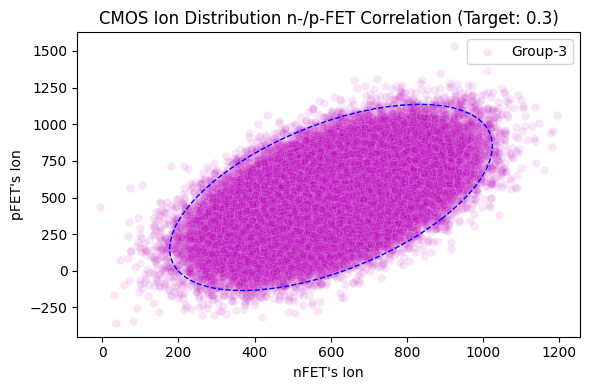

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.patches import Ellipse

np.random.seed(0)

## Group-3 with specified correlation coefficient
random_nFET = np.random.randn(100000)  # Un-Correlated
systematic_variation = np.random.randn(100000)  # Systematic Variation

# Define correlation coefficient
correlation_coefficient = 0.1

# Generate correlated random_pFET
random_pFET = correlation_coefficient * random_nFET + np.sqrt(1 - correlation_coefficient**2) * np.random.randn(100000)

# Calculate mean and standard deviations
mean_nFET = 600
mean_pFET = 500
std_dev_nFET = 100
std_dev_pFET = 150

# Create NFET_Ion_3 and PFET_Ion_3 with correlation
NFET_Ion_3 = (random_nFET + systematic_variation) * std_dev_nFET + mean_nFET
PFET_Ion_3 = (random_pFET + systematic_variation) * std_dev_pFET + mean_pFET

DF_CMOS = pd.DataFrame({
    'nFET-3': NFET_Ion_3, 'pFET-3': PFET_Ion_3,
})

# Scatter plot 생성
plt.figure(figsize=(6, 4))
ax = plt.gca()
sns.scatterplot(x=DF_CMOS['nFET-3'], y=DF_CMOS['pFET-3'], alpha=0.1, color='m', label='Group-3', ax=ax)
ax.set_title('CMOS Ion Distribution n-/p-FET Correlation (Target: 0.3)')
ax.set_xlabel("nFET's Ion")
ax.set_ylabel("pFET's Ion")
ax.legend()

# Calculate covariance matrix
cov_3 = np.cov(DF_CMOS[['nFET-3', 'pFET-3']], rowvar=False)

# Plot 3 sigma ellipse
mean_3 = DF_CMOS['nFET-3'].mean(), DF_CMOS['pFET-3'].mean()
sigma3_3 = 3 * DF_CMOS['nFET-3'].std(), 3 * DF_CMOS['pFET-3'].std()

eigenvalues, eigenvectors = np.linalg.eigh(cov_3)
order = eigenvalues.argsort()[::-1]
eigenvalues = eigenvalues[order]
eigenvectors = eigenvectors[:, order]

std_deviation = np.sqrt(eigenvalues) * 3

ellipse = Ellipse(xy=mean_3, width=std_deviation[0] * 2, height=std_deviation[1] * 2,
                  angle=np.degrees(np.arctan2(*eigenvectors[:, 0][::-1])),
                  edgecolor='b', fc='None', lw=1, linestyle='--')
ax.add_patch(ellipse)

plt.tight_layout()
plt.show()


random한 nFET 데이터를 생성
이 데이터를 이용하여 원하는 correlation coefficient (여기서는 0.3)를 갖는 pFET 데이터를 생성
systematic variation을 더해주고, 각각의 평균과 표준편차를 곱하여 최종적으로 NFET_Ion_3과 PFET_Ion_3를 생성
이 데이터를 시각화하고, 3 시그마 범위의 타원 생성


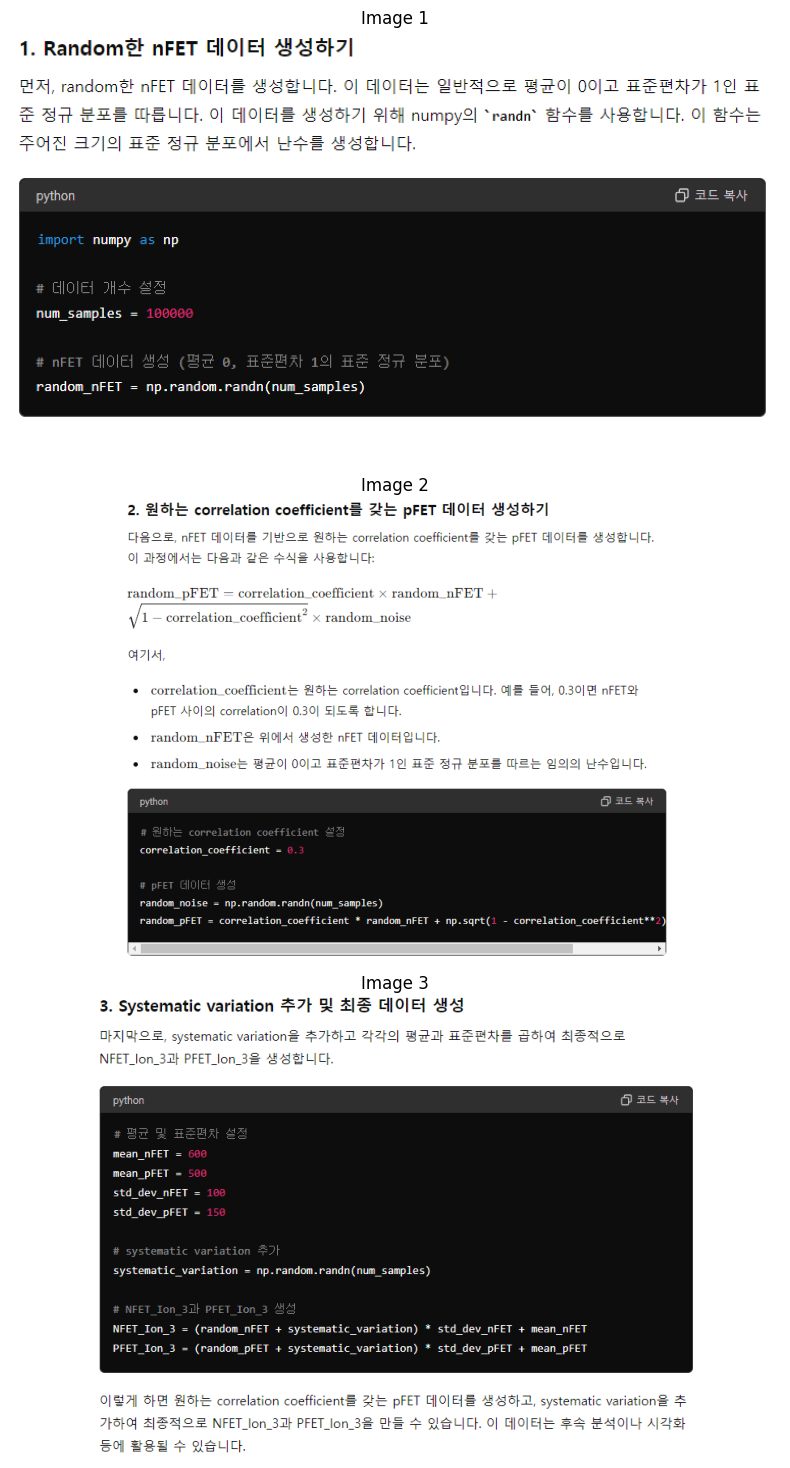

In [10]:
from PIL import Image
import matplotlib.pyplot as plt

# 이미지 파일 경로 설정
image_path1 = '/content/drive/MyDrive/KITA_2024/자료DB/System_Random01.png'
image_path2 = '/content/drive/MyDrive/KITA_2024/자료DB/System_Random02.png'
image_path3 = '/content/drive/MyDrive/KITA_2024/자료DB/System_Random03.png'

# 이미지 불러오기
image1 = Image.open(image_path1)
image2 = Image.open(image_path2)
image3 = Image.open(image_path3)

# subplot 생성
fig, axes = plt.subplots(3, 1, figsize=(8, 15))

# 첫 번째 subplot에 이미지 표시
axes[0].imshow(image1)
axes[0].axis('off')
axes[0].set_title('Image 1')

# 두 번째 subplot에 이미지 표시
axes[1].imshow(image2)
axes[1].axis('off')
axes[1].set_title('Image 2')

# 세 번째 subplot에 이미지 표시
axes[2].imshow(image3)
axes[2].axis('off')
axes[2].set_title('Image 3')

# subplot 간의 간격 조정 및 출력
plt.tight_layout()
plt.show()


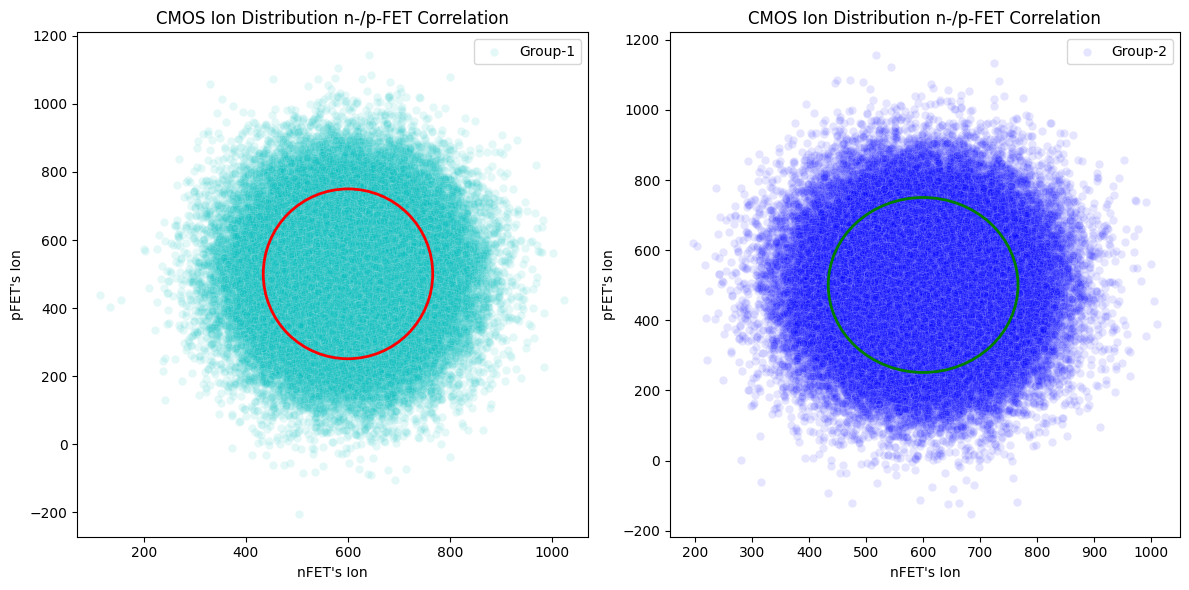

In [ ]:
import numpy as np
import pandas as pd
from scipy.stats import gaussian_kde
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.patches import Ellipse

np.random.seed(0)
################# CMOS Characteristics On-Currents
NFET_Ion_1=np.random.normal(loc=600, scale=100, size=100000)
PFET_Ion_1=np.random.normal(loc=500, scale=150, size=100000)

################# CMOS Characteristics On-Currents (randn)
NFET_Ion_2=np.random.randn(100000)*100+600
PFET_Ion_2=np.random.randn(100000)*150+500

DF_CMOS = pd.DataFrame({
    'nFET-1': NFET_Ion_1, 'pFET-1': PFET_Ion_1,
    'nFET-2' : NFET_Ion_2, 'pFET-2': PFET_Ion_2
})

# Scatter plot 생성
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
ax1 = plt.gca()  # 첫 번째 subplot의 축 가져오기
sns.scatterplot(x=DF_CMOS['nFET-1'] , y=DF_CMOS['pFET-1'], alpha=0.1, color='c', label='Group-1')
plt.title('CMOS Ion Distribution n-/p-FET Correlation')
plt.xlabel("nFET's Ion")
plt.ylabel("pFET's Ion")
plt.legend()

plt.subplot(1, 2, 2)
ax2 = plt.gca()  # 첫 번째 subplot의 축 가져오기
sns.scatterplot(x=DF_CMOS['nFET-2'] , y=DF_CMOS['pFET-2'], alpha=0.1, color='b', label='Group-2')
plt.title('CMOS Ion Distribution n-/p-FET Correlation')
plt.xlabel("nFET's Ion")
plt.ylabel("pFET's Ion")
plt.legend()

# Median 및 Mean 계산
median_1 = DF_CMOS['nFET-1'].median(), DF_CMOS['pFET-1'].median()
median_2 = DF_CMOS['nFET-2'].median(), DF_CMOS['pFET-2'].median()

mean_1 = DF_CMOS['nFET-1'].mean(), DF_CMOS['pFET-1'].mean()
mean_2 = DF_CMOS['nFET-2'].mean(), DF_CMOS['pFET-2'].mean()

# 3시그마 범위에 해당하는 타원 그리기
def plot_3sigma(ax, mean, cov, color):
    sigma_x = np.sqrt(cov[0, 0])
    sigma_y = np.sqrt(cov[1, 1])
    sigma_xy = cov[0, 1]

    theta = np.arctan2(2 * sigma_xy, (sigma_x**2 - sigma_y**2)) / 2

    width = 2 * np.sqrt(2 * np.log(2) * (sigma_x**2 + sigma_y**2 +
                                         np.sqrt((sigma_x**2 - sigma_y**2)**2 + (2*sigma_xy)**2)))
    height = 2 * np.sqrt(2 * np.log(2) * (sigma_x**2 + sigma_y**2 -
                                          np.sqrt((sigma_x**2 - sigma_y**2)**2 + (2*sigma_xy)**2)))
    ellipse = Ellipse(xy=mean, width=width, height=height, angle=np.degrees(theta),
                      edgecolor=color, fc='None', lw=2)
    ax.add_patch(ellipse)

# 3시그마 범위 계산 및 그리기
cov_1 = np.cov(DF_CMOS[['nFET-1', 'pFET-1']], rowvar=False)
cov_2 = np.cov(DF_CMOS[['nFET-2', 'pFET-2']], rowvar=False)

plot_3sigma(ax1, mean_1, cov_1, 'red')  # 첫 번째 subplot에 타원 그리기
plot_3sigma(ax2, mean_2, cov_2, 'green') # 두 번째 subplot에 타원 그리기

plt.tight_layout()
plt.show()




plot_3sigma 함수 정의: <br>

이 함수는 타원을 그리는데 사용 <br>
함수는 네 개의 매개변수를 가짐: <br>
ax: 타원을 그릴 서브플롯의 축 <br>
mean: 타원의 중심 좌표. <br>
cov: 공분산 행렬. <br>
color: 타원의 선 색상. <br>
함수 내에서는 다음을 수행: <br>
np.linalg.eigh(cov)를 사용하여 공분산 행렬의 고유값과 고유벡터를 계산 <br>
고유값을 크기순으로 정렬. <br>
고유값에 3을 곱한 후, 해당 값을 표준편차로 사용하여 타원의 크기를 계산. <br>
Ellipse 객체를 생성하여 타원을 그림 <br>
cov_1 및 cov_2 계산: <br>

np.cov 함수를 사용하여 각각의 CMOS 특성 변수에 대한 공분산 행렬을 계산 <br>
plot_3sigma 함수 호출: <br>

각 서브플롯에 대해 plot_3sigma 함수를 호출하여 3시그마 범위의 타원을 그림 <br>
각 호출에서는 각각의 subplot의 축 ax1 및 ax2, 해당 subplot의 특성 변수에 대한 평균값 mean_1 및 mean_2, 그리고 공분산 행렬 cov_1 및 cov_2가 전달 <br>
두 개의 subplot에 대해 각각 다른 색상으로 타원이 그려짐. <br>

일반적으로 표준형태의 타원의 방정식:
(x - h)^2 / a^2 + (y - k)^2 / b^2 = 1

(h,k)는 타원의 중심점이고, <br>
𝑎: x-축 방향의 반축길이(타원의 가로 반지름), <br>
𝑏: y-축 방향의 반축길이(타원의 세로 반지름) <br>
이렇게 표현된 타원의 방정식에서 𝑎와 𝑏가 같으면, 타원은 원. <br>

이러한 표준형태의 타원 방정식에서 𝑎와 𝑏는 타원의 크기와 형태를 결정하며, (ℎ,𝑘)는 타원의 위치를 나타냄 <br>

In [ ]:
DF_CMOS.head()

,nFET-1,pFET-1,nFET-2,pFET-2
0,776.405235,427.430376,603.950990,740.860566
1,640.015721,693.208560,633.837761,335.793549
2,697.873798,480.518193,515.781681,688.755836
3,824.089320,470.288242,595.036772,718.713608
4,786.755799,449.826861,476.975464,456.169520


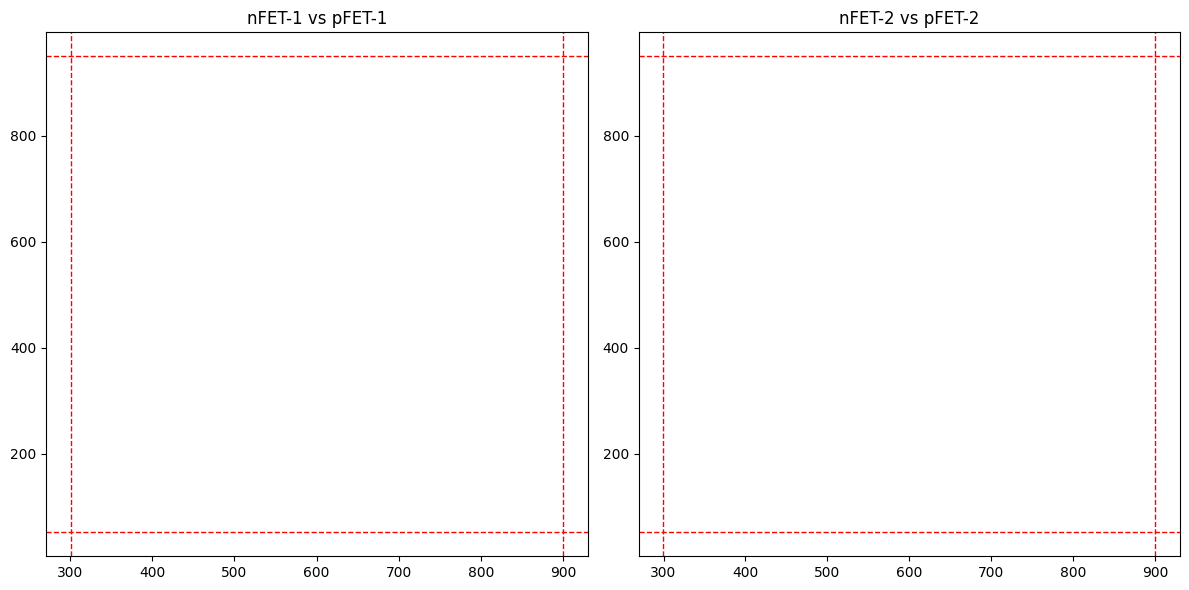

In [ ]:
# 그래프 생성
fig, axes = plt.subplots(1, 2, figsize=(12, 6))

# 3-sigma boundary 계산
nfet1_mean, nfet1_std = DF_CMOS['nFET-1'].mean(), DF_CMOS['nFET-1'].std()
pfet1_mean, pfet1_std = DF_CMOS['pFET-1'].mean(), DF_CMOS['pFET-1'].std()
nfet2_mean, nfet2_std = DF_CMOS['nFET-2'].mean(), DF_CMOS['nFET-2'].std()
pfet2_mean, pfet2_std = DF_CMOS['pFET-2'].mean(), DF_CMOS['pFET-2'].std()

nfet1_upper, nfet1_lower = nfet1_mean + 3 * nfet1_std, nfet1_mean - 3 * nfet1_std
pfet1_upper, pfet1_lower = pfet1_mean + 3 * pfet1_std, pfet1_mean - 3 * pfet1_std
nfet2_upper, nfet2_lower = nfet2_mean + 3 * nfet2_std, nfet2_mean - 3 * nfet2_std
pfet2_upper, pfet2_lower = pfet2_mean + 3 * pfet2_std, pfet2_mean - 3 * pfet2_std

# subplot 1
#sns.kdeplot(data=DF_CMOS, x='nFET-1', y='pFET-1', ax=axes[0], fill=True)
axes[0].axvline(nfet1_upper, color='r', linestyle='--', linewidth=1)
axes[0].axvline(nfet1_lower, color='r', linestyle='--', linewidth=1)
axes[0].axhline(pfet1_upper, color='r', linestyle='--', linewidth=1)
axes[0].axhline(pfet1_lower, color='r', linestyle='--', linewidth=1)
axes[0].set_title('nFET-1 vs pFET-1')

# subplot 2
#sns.kdeplot(data=DF_CMOS, x='nFET-2', y='pFET-2', ax=axes[1], fill=True)
axes[1].axvline(nfet2_upper, color='r', linestyle='--', linewidth=1)
axes[1].axvline(nfet2_lower, color='r', linestyle='--', linewidth=1)
axes[1].axhline(pfet2_upper, color='r', linestyle='--', linewidth=1)
axes[1].axhline(pfet2_lower, color='r', linestyle='--', linewidth=1)
axes[1].set_title('nFET-2 vs pFET-2')

plt.tight_layout()
plt.show()

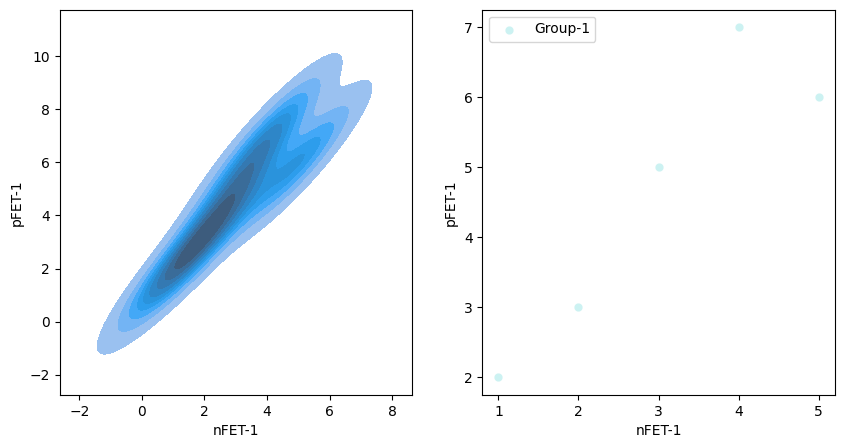

In [ ]:

############################################################################################## sns.kdeplot의 예제

import pandas as pd
from scipy.stats import gaussian_kde
import matplotlib.pyplot as plt
import seaborn as sns

# 예제 데이터 생성
data = {
    'nFET-1': [1, 2, 3, 4, 5],
    'pFET-1': [2, 3, 5, 7, 6]
}
DF_CMOS = pd.DataFrame(data)

# figure와 axes 생성
fig, axes = plt.subplots(1, 2, figsize=(10, 5))

# KDE plot 그리기
sns.kdeplot(x=DF_CMOS['nFET-1'], y=DF_CMOS['pFET-1'], ax=axes[0], fill=True)                                      # 아래처럼해도 가능 둘다 가능
#sns.kdeplot(data=DF_CMOS, x='nFET-1', y='pFET-1', ax=axes[0], fill=True)

# scatter plot 그리기
#sns.scatterplot(x=DF_CMOS['nFET-1'], y=DF_CMOS['pFET-1'], alpha=0.2, color='c', label='Group-1', ax=axes[1])     # 아래처럼해도 가능 둘다 가능
sns.scatterplot(data=DF_CMOS, x='nFET-1', y='pFET-1', alpha=0.2, color='c', label='Group-1', ax=axes[1])

plt.show()
